In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [5]:
y_train[3]

4

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classes[y_train[3]]

'deer'

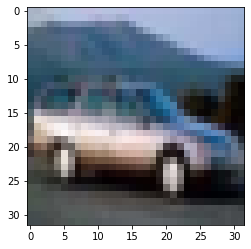

In [7]:
plt.imshow(x_train[4])

In [8]:
def plot_image(x, y, index):
    plt.figure(figsize = (10, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

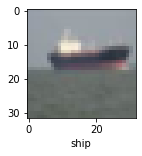

In [9]:
plot_image(x_train, y_train, 69)

In [10]:
#Normalization

x_train = x_train / 255.
x_test = x_test / 255.

In [13]:
CNN = tf.keras.models.Sequential([
    layers.Conv2D(filters = 20, kernel_size = (5, 5), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 60, kernel_size = (5, 5), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 80, kernel_size = (5, 5), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
])

In [14]:
CNN.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [15]:
CNN.fit(x_train, y_train, epochs = 7)

Epoch 1/7
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5634 - accuracy: 0.4298
Epoch 2/7
1563/1563 [==============================] - 68s 43ms/step - loss: 1.2229 - accuracy: 0.5625
Epoch 3/7
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0899 - accuracy: 0.6129
Epoch 4/7
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0061 - accuracy: 0.6463
Epoch 5/7
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9411 - accuracy: 0.6687
Epoch 6/7
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8862 - accuracy: 0.6879
Epoch 7/7
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8458 - accuracy: 0.7020


In [16]:
CNN.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9743 - accuracy: 0.6563


[0.9743409156799316, 0.6563000082969666]

In [17]:
y_predicted = CNN.predict(x_test)

In [18]:
y_predicted[1]

array([2.6234251e-02, 1.1614055e-01, 1.8069865e-04, 2.4721046e-05,
       8.4985128e-05, 7.5633156e-06, 2.3864042e-05, 3.1879376e-06,
       8.3391303e-01, 2.3387177e-02], dtype=float32)

In [19]:
y_pred = [np.argmax(i) for i in y_predicted]
y_pred

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 3,
 7,
 9,
 6,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 4,
 4,
 0,
 9,
 6,
 6,
 2,
 8,
 3,
 9,
 8,
 7,
 9,
 9,
 5,
 4,
 6,
 7,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 9,
 8,
 6,
 3,
 8,
 8,
 7,
 5,
 5,
 7,
 7,
 7,
 2,
 3,
 6,
 6,
 1,
 0,
 3,
 7,
 2,
 5,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 8,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 8,
 6,
 3,
 7,
 4,
 0,
 2,
 2,
 9,
 7,
 2,
 4,
 6,
 3,
 8,
 2,
 1,
 2,
 8,
 8,
 0,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 3,
 5,
 6,
 3,
 8,
 7,
 6,
 6,
 7,
 3,
 8,
 1,
 6,
 0,
 0,
 3,
 2,
 9,
 3,
 4,
 0,
 1,
 5,
 6,
 0,
 7,
 8,
 4,
 9,
 0,
 9,
 7,
 1,
 8,
 9,
 9,
 3,
 7,
 3,
 0,
 8,
 7,
 2,
 3,
 7,
 8,
 6,
 2,
 3,
 8,
 7,
 8,
 9,
 1,
 7,
 6,
 8,
 8,
 7,
 8,
 3,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 1,
 5,
 7,
 8,
 0,
 0,
 9,
 8,
 2,
 7,
 6,
 9,
 7,
 3,
 9,
 3,
 2,
 3,
 6,
 3,
 1,
 2,
 8,
 8,
 0,
 4,
 7,
 3,
 3,
 1,
 1,
 1,
 9,
 0,
 2,
 1,
 8,
 2,
 0,


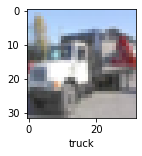

In [20]:
plot_image(x_test, y_test, 45)

In [21]:
classes[y_pred[45]]

'truck'